In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
hbar = 1.0545718e-34
k_B = 1.38064852e-23
m0 = 1.660539066e-27
a0 = 5.2917721067e-11
m = 164 * m0
a_dd = 131*a0

In [3]:
def tau_k(kr, kz):
    return hbar**2*(kr**2+kz**2)/(2*m)

def a_s_func(a_dd, eps_dd):
    return a_dd/eps_dd*1

def V_tilde(kr, kz, a_s):
    return 4*np.pi*hbar**2*a_s/m + 4*np.pi*hbar**2*a_dd/m*(3*(kz**2)/(kr**2 + kz**2) - 1)

def epsilon_k(kr, kz, a_s, n):
    return np.sqrt(tau_k(kr, kz)*(tau_k(kr, kz) + 2*n*V_tilde(kr, kz, a_s)))

def integrand(k, a_s, eps_dd, n, T):
    return 1/(2*np.pi)**3 * 1/(np.exp(epsilon_k(k, a_s, eps_dd, n)/(k_B*T)) - 1)*V_tilde(k, a_s, eps_dd) * tau_k(k)/epsilon_k(k, a_s, n)

In [4]:
n_points = 1000
a_s = a_s_func(a_dd, 1.31)
#558.26*10**(18)
nums = [1, 3, 5, 7]
data = {}
k_x = np.linspace(0, 0.05, n_points)/a_dd
k_y = np.linspace(0, 0.05, n_points)/a_dd
k_z = np.linspace(0, 0.008, n_points)/a_dd
k_r = np.sqrt(k_x**2 + k_y**2)

for num in nums:
    vals = np.zeros((len(k_r), len(k_z)))
    n = num/(12*np.pi*a_dd)**3
    for iz, kz in enumerate(k_z):
        for ir, kr in enumerate(k_r):
            if tau_k(kr, kz) + 2*n*V_tilde(kr, kz, a_s) < 0:
                vals[ir, iz] = 1
            else:
                vals[ir, iz] = 0
    data[f"vals{num}"] = vals

C:\Users\DyLab - OfficePC\AppData\Local\Temp\ipykernel_22300\1391470084.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return 4*np.pi*hbar**2*a_s/m + 4*np.pi*hbar**2*a_dd/m*(3*(kz**2)/(kr**2 + kz**2) - 1)


(0.0, 0.05)

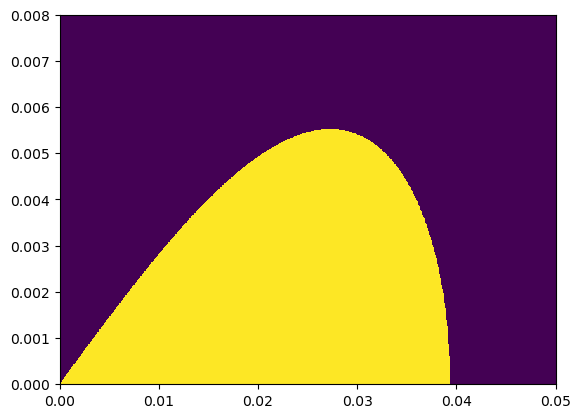

In [ ]:
R, Z = np.meshgrid(k_r*a_dd, k_z*a_dd)
plt.pcolor(R, Z, vals.T)
plt.xlim(0, 0.05)

(0.0, 0.05)

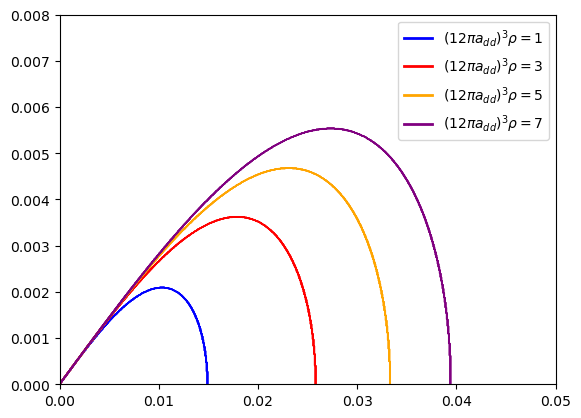

In [7]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
colors = ["blue", "red", "orange", "purple"]
legend_elements = []
R, Z = np.meshgrid(k_r*a_dd, k_z*a_dd)
for i, num in enumerate(nums):
    plt.contour(R, Z, data[f"vals{num}"].T, colors = colors[i], linewidths = 1)
    legend_elements.append(Line2D([0], [0], color = colors[i], lw = 2, label = "$(12\pi a_{dd})^3\\rho = $"+str(num)))
plt.gca().legend(handles=legend_elements)
plt.xlim(0, 0.05)

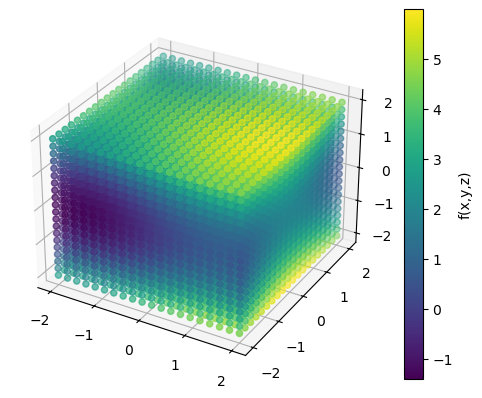

In [ ]:
# Sample points
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
z = np.linspace(-2, 2, 20)
X, Y, Z = np.meshgrid(x, y, z)
F = integrand(X, Y, Z)

# Flatten for scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X, Y, Z, c=F, cmap='viridis')
fig.colorbar(p, label='f(x,y,z)')
plt.show()